### Compute Colley Ratings

In [5]:
import pandas as pd
import numpy as np
import scipy.stats
from math import ceil 

gameFilename = '2024_Games.txt'
teamFilename = '2024_Teams.txt'
k = 20

# Set weights for home, away and neutral wins
weightHomeWin = 1
weightAwayWin = 1.5
weightNeutralWin = 1.25
segmentWeighting = [0.25,0.5,0.75,1]

# Will you use weighting? 
useWeighting = True

# Load teams
teamNames = pd.read_csv(teamFilename, header = None)
numTeams = len(teamNames)

# Load games
games = pd.read_csv(gameFilename, header = None)
numGames = len(games)

import numpy as np

colleyMatrix = 2*np.diag(np.ones(numTeams))
b = np.ones(numTeams)

dayBeforeSeason = games.loc[0,0] - 1
lastDayOfSeason = games.loc[len(games)-1,0]

for i in range(numGames):
    team1ID = games.loc[i, 2] - 1 # subtracting 1 since python indexes at 0
    team1Score = games.loc[i, 4]
    team1Loc = games.loc[i, 3];

    team2ID = games.loc[i, 5] - 1 # subtracting 1 since python indexes at 0
    team2Score = games.loc[i, 7]
    team2Loc = games.loc[i, 6];
    
    currentDay = games.loc[i,0]
    
    if useWeighting:
        numberSegments = len(segmentWeighting)
        weightIndex = ceil(numberSegments*((currentDay-dayBeforeSeason)/(lastDayOfSeason-dayBeforeSeason))) - 1
        timeWeight = segmentWeighting[weightIndex]
    else:
        timeWeight = 1

    if team1Score > team2Score:  # Team 1 won        
        if (team1Loc == 1):      # Home win
            gameWeight = weightHomeWin*timeWeight
        elif (team1Loc == -1):   # Away win
            gameWeight = weightAwayWin*timeWeight
        else:                    # Neutral court win
            gameWeight = weightNeutralWin*timeWeight
    else:                        # Team 2 won
        if (team2Loc == 1):      # Home win
            gameWeight = weightHomeWin*timeWeight
        elif (team2Loc == -1):   # Away win
            gameWeight = weightAwayWin*timeWeight
        else:                    # Neutral court win
            gameWeight = weightNeutralWin*timeWeight

    # Update the Colley matrix and RHS
    colleyMatrix[team1ID, team2ID] -= gameWeight
    colleyMatrix[team2ID, team1ID] -= gameWeight

    colleyMatrix[team1ID, team1ID] += gameWeight
    colleyMatrix[team2ID, team2ID] += gameWeight

    if team1Score > team2Score:
        b[team1ID] += 1/2*gameWeight
        b[team2ID] -= 1/2*gameWeight
    elif team1Score < team2Score:
        b[team1ID] -= 1/2*gameWeight
        b[team2ID] += 1/2*gameWeight
    else:  # it is a tie and make 1/2 a win and 1/2 a loss for both teams
        b[team1ID] += 0; # this equates to adding nothing
        b[team2ID] += 0; # clearly this code could be deleted

# Calculate linear system
r = np.linalg.solve(colleyMatrix,b)
iSort = np.argsort(-r)
#print(colleyMatrix)
#print(b)
print(numGames)

5709


## Compute probability

In [2]:
stdDev = np.std(r)
zScore = (r-np.mean(r))/stdDev

team1ID = 50-1 # Duke
team2ID = 10-1 # North Carolina
zscoreDiff = zScore[team1ID] - zScore[team2ID]
winProbability =  0.5 + scipy.stats.norm.cdf(zscoreDiff)-scipy.stats.norm.cdf(-zscoreDiff)
%store winProbability
print(f'Probability of %s beating %s = %5.2f' % (teamNames.loc[team1ID,1],teamNames.loc[team2ID,1], (100*winProbability)))


Stored 'winProbability' (float64)
Probability of  Clemson beating  Arizona = 11.87


In [21]:
print('\n\n************** MASSEY Rating Method **************\n')
print('==================================================')
print('Rank   Rating      Team')
print('==================================================')
if k==0:
    numberTeamToPrint = numTeams
else:
    numberTeamToPrint = k

for i in range(numberTeamToPrint):
    print(f'{i+1:4d}   {r[iSort[i]]:9.5f}  {teamNames.loc[iSort[i],1]}')
    
print('')   # extra carriage return



************** MASSEY Rating Method **************

Rank   Rating      Team
   1     1.06722   Purdue
   2     1.06241   Connecticut
   3     0.99729   Houston
   4     0.95106   North_Carolina
   5     0.95060   Illinois
   6     0.93691   Iowa_St
   7     0.93197   Tennessee
   8     0.92328   Duke
   9     0.90416   Alabama
  10     0.89679   Auburn
  11     0.86897   Arizona
  12     0.86512   Marquette
  13     0.85073   Colorado
  14     0.84704   Utah_St
  15     0.84436   Gonzaga
  16     0.84064   Drake
  17     0.83896   Grand_Canyon
  18     0.83790   South_Carolina
  19     0.83643   Indiana_St
  20     0.83173   Dayton



### Histogram of ratings

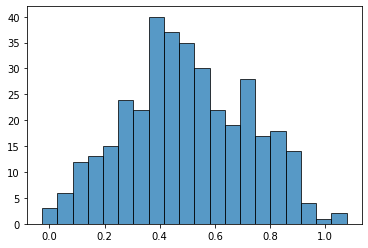

In [ ]:
import matplotlib.pyplot as plt

plt.hist(r,bins=20,alpha=0.75, rwidth=1,edgecolor='black')
plt.show() 

***

### Scrap work

In [ ]:
print('%s %f ' % (teamNames.loc[team1ID,1],zScore[team1ID]))
#print('Davidson ',zScore[Davidson])

 Duke 1.736319 


In [ ]:
zscoreDiff = zScore[Duke] - zScore[Davidson]
print(scipy.stats.norm.cdf(zscoreDiff)-scipy.stats.norm.cdf(-zscoreDiff))
print(-(scipy.stats.norm.cdf(zscoreDiff)-scipy.stats.norm.cdf(-zscoreDiff)))


0.8865160236605936
-0.8865160236605936


In [ ]:
50 - (scipy.stats.norm.cdf(zScore[team1ID])+scipy.stats.norm.cdf(zScore[team2ID]))

48.06083776697257